In [5]:
from utils.multiple_hits_utils import read_multiple_hits
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [542]:
ens1 = [20.0]; 
ens2 = np.arange(2.0, 42.0, 2.0)
ens2 = [32.0]
energies = np.append(ens1, ens2)

center_diffs = []

num_runs = 500
for en1 in energies:
    for en2 in energies:
        name = 'center_%.1fGeV_outside_%.1f_%iruns' %(en1, en2, num_runs)
        sim_direct = 'simulations/multiple_hits/'
        images, labels, runs_dict = read_multiple_hits(sim_direct, name, img_size=64, add_noise=False, 
                                                   read_dict=True, predict=True, read_images=False)

        for run in range(num_runs):
            d = runs_dict[str(run)]
            diff = d['center_differences']
            center_diffs.append(diff)


In [543]:
center_diffs = np.array(center_diffs)

In [544]:
center_diffs.size

2000

## Histogram of center differences for multiple simulations

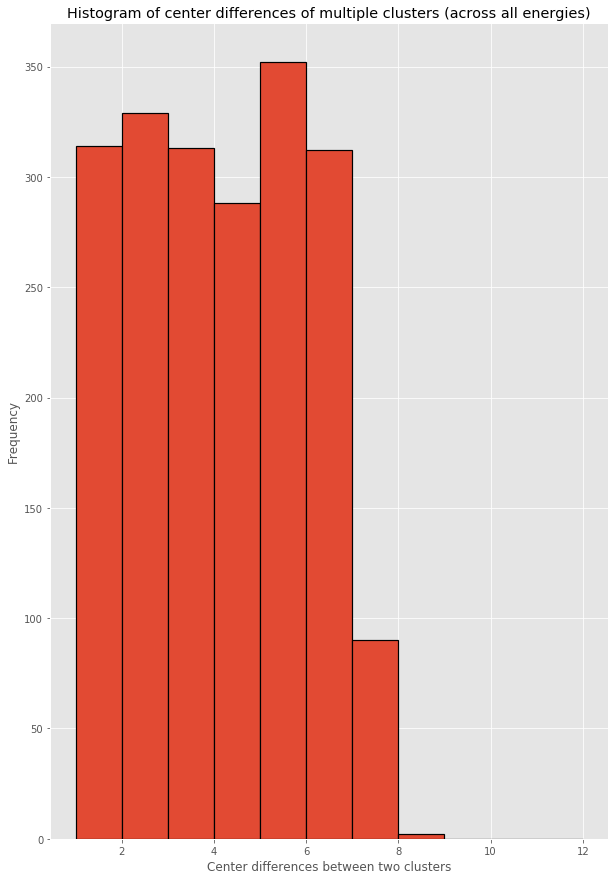

In [545]:
plt.figure(figsize=(10,15))
plt.style.use('ggplot')

plt.hist(center_diffs, bins = range(1, 13), edgecolor='black', linewidth=1.2)
plt.title('Histogram of center differences of multiple clusters (across all energies)')
# plt.xticks(np.arange(0, 15, 1.0))
# plt.yticks(range(0, 31000, 1000))
plt.xlabel('Center differences between two clusters')
plt.ylabel('Frequency')
# plt.xlim([0, 14])
plt.show()

## Intrinsic Resolutions

In [31]:
from utils.training_utils import get_images_single_hit

In [32]:
resolutions_intrinsic = []

en1 = np.array([0.1])
en2 = np.arange(2, 42, 2)
energies = np.append(en1, en2)

for en in energies:
    sim_direct = 'simulations/single_hits/'
    images = get_images_single_hit(sim_direct, en, num_runs=500, add_noise = False)
#     print(images.shape)
    images = np.reshape(images, (500, 32, 1024, 1))
    
    energies_layers = np.sum(images, axis=2)
    energies_runs = np.sum(energies_layers, axis=1)
#     print(energies_runs.shape)
    
#     print(np.std(energies_runs))
#     print(np.mean(energies_runs))
    rel_resolution = np.std(energies_runs)/np.mean(energies_runs)
    resolutions_intrinsic.append(rel_resolution)

    print(f'Relative resolution for energy %.1f is {rel_resolution:.8f}' %(en))



Relative resolution for energy 0.1 is 0.22418381
Relative resolution for energy 2.0 is 0.05222453
Relative resolution for energy 4.0 is 0.03871616
Relative resolution for energy 6.0 is 0.03236893
Relative resolution for energy 8.0 is 0.02533582
Relative resolution for energy 10.0 is 0.02463669
Relative resolution for energy 12.0 is 0.02105425
Relative resolution for energy 14.0 is 0.01904324
Relative resolution for energy 16.0 is 0.01821736
Relative resolution for energy 18.0 is 0.01822813
Relative resolution for energy 20.0 is 0.01774925
Relative resolution for energy 22.0 is 0.01582650
Relative resolution for energy 24.0 is 0.01462365
Relative resolution for energy 26.0 is 0.01442320
Relative resolution for energy 28.0 is 0.01502454
Relative resolution for energy 30.0 is 0.01409441
Relative resolution for energy 32.0 is 0.01367566
Relative resolution for energy 34.0 is 0.01251105
Relative resolution for energy 36.0 is 0.01239598
Relative resolution for energy 38.0 is 0.01178984
Relat

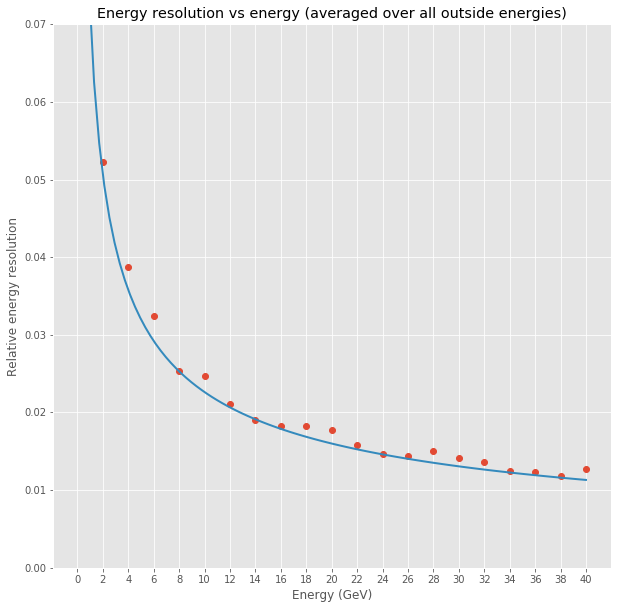

In [33]:
plt.figure(figsize=(10,10))
plt.plot(energies, resolutions_intrinsic, 'o')
plt.style.use('ggplot')
plt.xticks(range(0, 42, 2))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (averaged over all outside energies)')
plt.plot(energy, model_fit_intrinsic, label = 'fit', linewidth = 2.0)
plt.ylim([0.00,0.07])
plt.show()

In [34]:
from scipy.optimize import curve_fit

def fit_func_intrinsic(energy, a):
    return  np.sqrt( (a/np.sqrt(energy))**2)

In [35]:
params = curve_fit(fit_func_intrinsic, energies, resolutions_intrinsic, (1.0))
a = params[0]
print("The estimated resolution of the calorimeter is %.4f/sqrt(E)" %(a))
energy = np.linspace(0.1,40,100)
model_fit_intrinsic = fit_func_intrinsic(energy, a)

The estimated resolution of the calorimeter is 0.0716/sqrt(E)


## Energy resolution (averaged over all outside energies)

In [36]:
import pickle 

direct = 'plots/unet-3d/'
name = 'unet3d_resolutions'
dict_direct = direct + name + ".p"
resolutions_dict = pickle.load(open(dict_direct, mode='rb'))

In [37]:
resolutions = []
ens1 = [0.1]
ens2 = np.arange(2, 42, 2)
energies = np.append(ens1, ens2)

for en in energies:
    res = resolutions_dict[en]
    resolutions.append(res)
resolutions = np.array(resolutions)

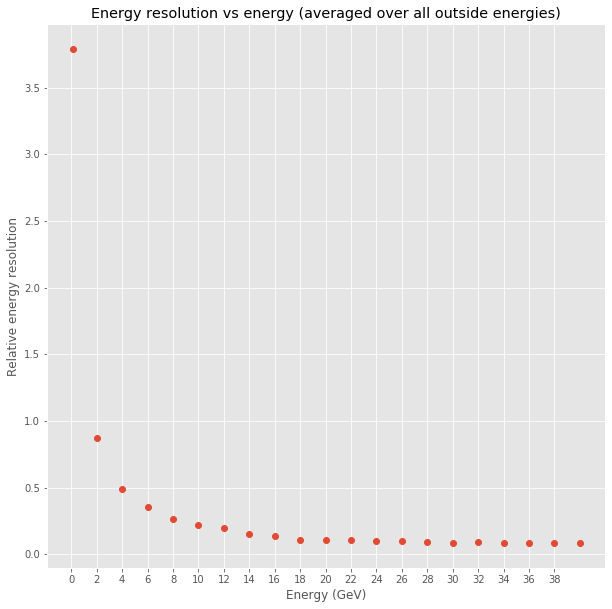

In [38]:
plt.figure(figsize=(10,10))
plt.plot(energies, resolutions, 'o')
plt.style.use('ggplot')
plt.xticks(range(0, 40, 2))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (averaged over all outside energies)')
plt.show()

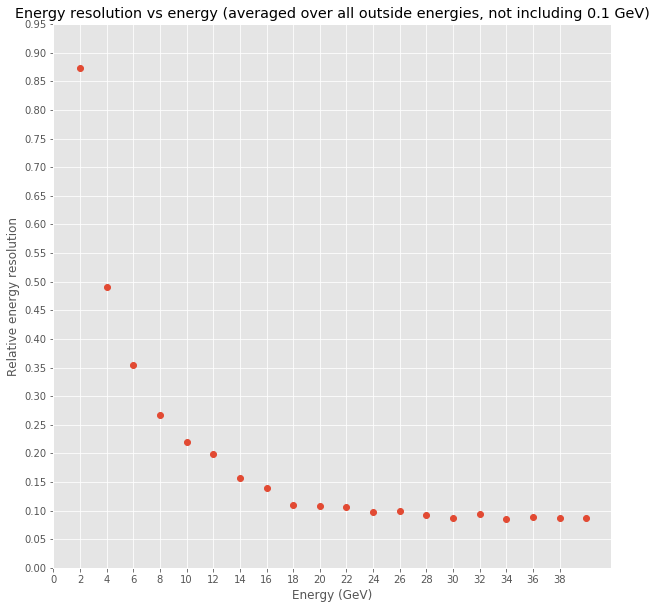

In [39]:
plt.figure(figsize=(10,10))
plt.plot(energies[1:], resolutions[1:], 'o')
plt.style.use('ggplot')
plt.xticks(range(0, 40, 2))
plt.yticks(np.arange(0.0, 1.0, 0.05))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (averaged over all outside energies, not including 0.1 GeV)')
plt.show()

In [41]:
resolutions_dict

{0.1: 3.790582683794208,
 2.0: 0.8737652984225653,
 4.0: 0.4903152762680918,
 6.0: 0.35395987718895466,
 8.0: 0.26724961432508215,
 10.0: 0.21997106227520408,
 12.0: 0.19851357507442208,
 14.0: 0.1572085858763566,
 16.0: 0.13895885577580797,
 18.0: 0.1101025911672571,
 20.0: 0.1071385258409493,
 22.0: 0.10667945998444932,
 24.0: 0.0976790292292667,
 26.0: 0.09858160181986686,
 28.0: 0.0922333004263744,
 30.0: 0.08699972346981091,
 32.0: 0.09430783941784053,
 34.0: 0.0855201687082401,
 36.0: 0.08869909572010885,
 38.0: 0.08672870454514553,
 40.0: 0.08780948502374407}

## Energy resolution vs energy (outside energy constant = 20.0 GeV)

In [42]:
direct = 'plots/unet-3d/'
name = 'unet3d_resolutions_outside20'
dict_direct = direct + name + ".p"
resolutions_dict_outside20 = pickle.load(open(dict_direct, mode='rb'))

In [43]:
resolutions_outside20 = []
for en in energies:
    res = resolutions_dict_outside20[en]
    resolutions_outside20.append(res)
resolutions_outside20 = np.array(resolutions_outside20)

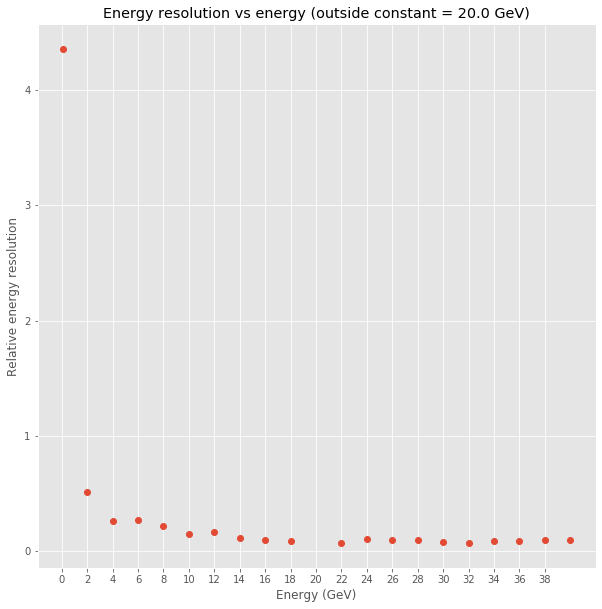

In [44]:
plt.figure(figsize=(10,10))
plt.plot(energies, resolutions_outside20, 'o')
plt.style.use('ggplot')
plt.xticks(range(0, 40, 2))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (outside constant = 20.0 GeV)')
plt.show()

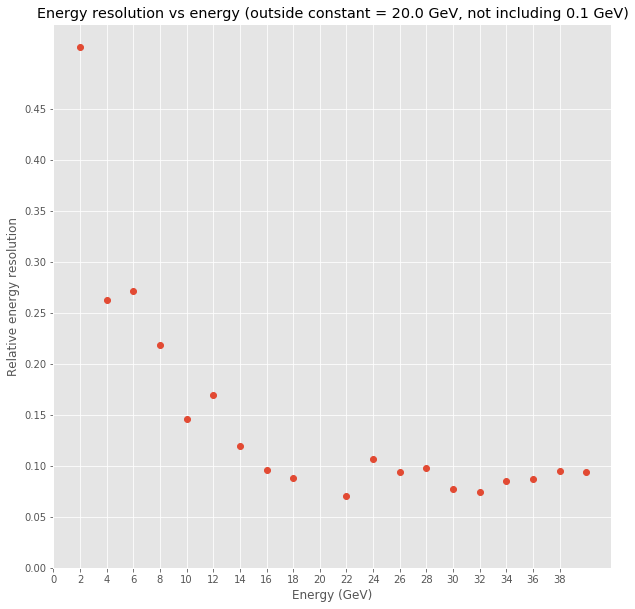

In [45]:
plt.figure(figsize=(10,10))
plt.plot(energies[1:], resolutions_outside20[1:], 'o')
plt.style.use('ggplot')
plt.xticks(range(0, 40, 2))
plt.yticks(np.arange(0.0, 0.50, 0.05))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (outside constant = 20.0 GeV, not including 0.1 GeV)')
plt.show()

In [46]:
resolutions_outside20

array([4.35551073, 0.51136357, 0.26290324, 0.27142153, 0.21849705,
       0.14574744, 0.16986901, 0.11924885, 0.09593687, 0.08831772,
              nan, 0.07079451, 0.10636738, 0.09386194, 0.09801237,
       0.07758173, 0.0743898 , 0.08541025, 0.08749124, 0.09501971,
       0.09371454])

In [48]:
resolutions_outside20[10] = (0.08831772 + 0.07079451)/2

## Energy resolution vs energy (outside constant = 2.0 GeV)

In [49]:
direct = 'plots/unet-3d/'
name = 'unet3d_resolutions_outside2'
dict_direct = direct + name + ".p"
resolutions_dict_outside2 = pickle.load(open(dict_direct, mode='rb'))

resolutions_outside2 = []

for en in energies:
    res = resolutions_dict_outside2[en]
    resolutions_outside2.append(res)
resolutions_outside2 = np.array(resolutions_outside2)

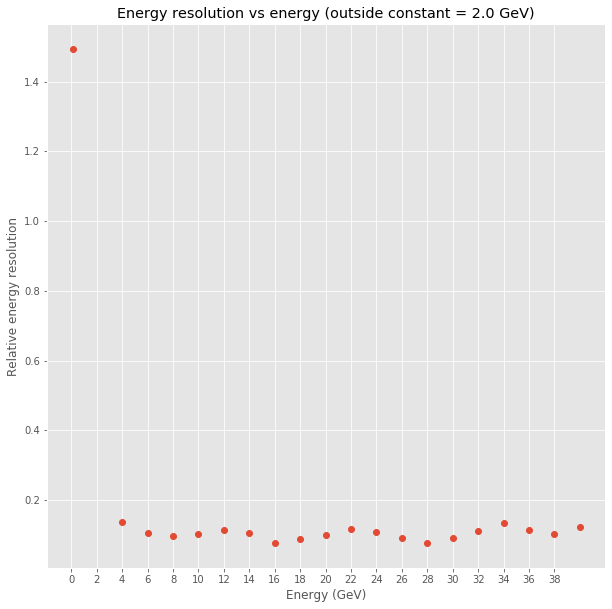

In [50]:
plt.figure(figsize=(10,10))
plt.plot(energies, resolutions_outside2, 'o')
plt.style.use('ggplot')
plt.xticks(range(0, 40, 2))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (outside constant = 2.0 GeV)')
plt.show()

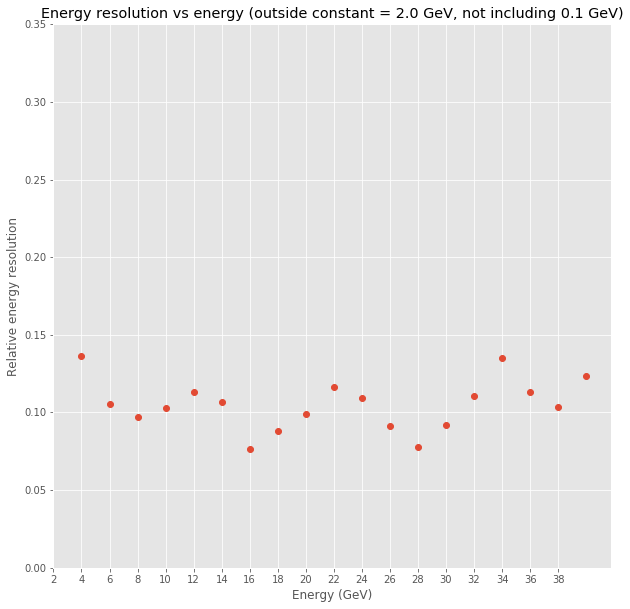

In [51]:
plt.figure(figsize=(10,10))
plt.plot(energies[1:], resolutions_outside2[1:], 'o')
plt.style.use('ggplot')
plt.xticks(range(2, 40, 2))
plt.yticks(np.arange(0.0, 0.40, 0.05))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (outside constant = 2.0 GeV, not including 0.1 GeV)')
plt.show()

In [53]:
resolutions_outside2[1] = 0.17659452

## Energy resolution vs energy (outside constant = 38.0 GeV)

In [54]:
direct = 'plots/unet-3d/'
name = 'unet3d_resolutions_outside38'
dict_direct = direct + name + ".p"
resolutions_dict_outside38 = pickle.load(open(dict_direct, mode='rb'))

resolutions_outside38 = []

for en in energies:
    res = resolutions_dict_outside38[en]
    resolutions_outside38.append(res)
resolutions_outside38 = np.array(resolutions_outside38)

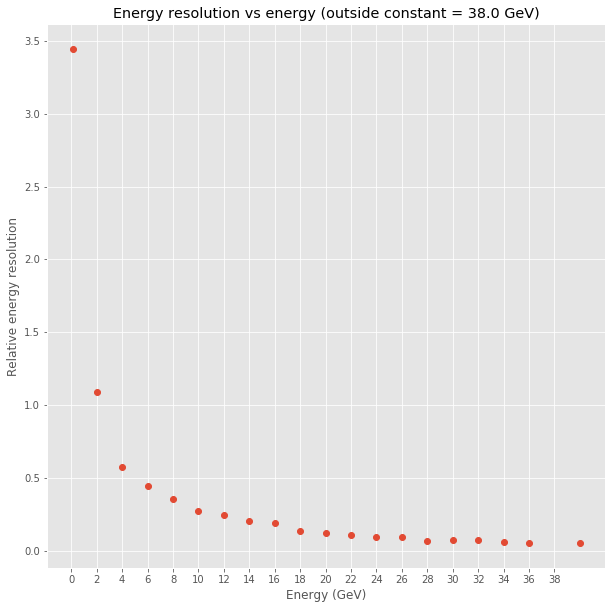

In [55]:
plt.figure(figsize=(10,10))
plt.plot(energies, resolutions_outside38, 'o')
plt.style.use('ggplot')
plt.xticks(range(0, 40, 2))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (outside constant = 38.0 GeV)')
plt.show()

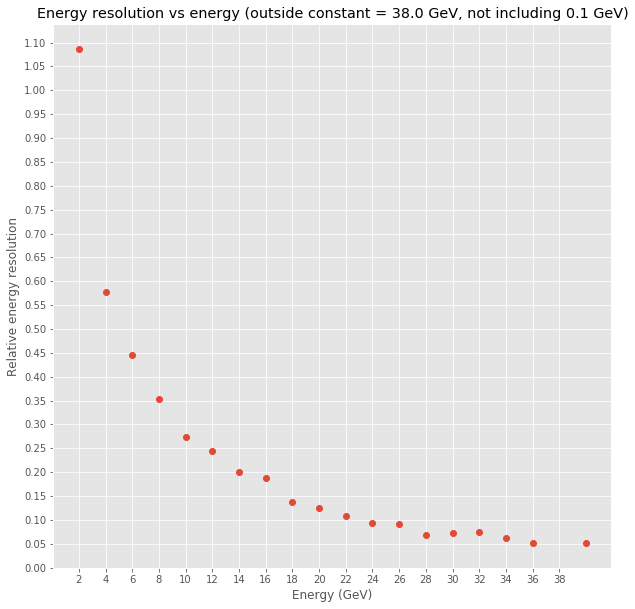

In [56]:
plt.figure(figsize=(10,10))
plt.plot(energies[1:], resolutions_outside38[1:], 'o')
plt.style.use('ggplot')
plt.xticks(range(2, 40, 2))
plt.yticks(np.arange(0.0, 1.15, 0.05))
plt.xlabel('Energy (GeV)')
plt.ylabel('Relative energy resolution')
plt.title('Energy resolution vs energy (outside constant = 38.0 GeV, not including 0.1 GeV)')
plt.show()

In [59]:
resolutions_outside38

array([3.44685945, 1.08670502, 0.57765412, 0.44517758, 0.35336567,
       0.27267549, 0.24534619, 0.20096665, 0.1875603 , 0.13651304,
       0.12416247, 0.10727271, 0.09366351, 0.09184704, 0.06919135,
       0.07351073, 0.07521275, 0.06158471, 0.0514304 , 0.05179483,
       0.05215925])

In [58]:
resolutions_outside38[-2] = (0.0514304+0.05215925)/2

In [60]:
from scipy.optimize import curve_fit

def fit_func(energy, a, b, c):
    return np.sqrt( (a/np.sqrt(energy))**2 + b**2 + (c/energy)**2 )

In [66]:
params1 = curve_fit(fit_func, energies[1:], resolutions[1:], (0.09, 0.03, 0.05))
a, b, c = params1[0]
print("The estimated resolution of the calorimeter is %.3f/sqrt(E) + %.3f/E" %(a, c))
energy = np.linspace(0.1,40,100)
model_fit1 = fit_func(energy, a, b, c)

params2 = curve_fit(fit_func, energies[1:], resolutions_outside20[1:], (0.09, 0.03, 0.05))
a, b, c = params2[0]
model_fit2 = fit_func(energy, a, b, c)

params3 = curve_fit(fit_func, energies[1:], resolutions_outside38[1:], (0.09, 0.03, 0.05))
a, b, c = params3[0]
model_fit3 = fit_func(energy, a, b, c)

params4 = curve_fit(fit_func, energies[1:], resolutions_outside2[1:], (0.09, 0.03, 0.05))
a, b, c = params4[0]
model_fit4 = fit_func(energy, a, b, c)


The estimated resolution of the calorimeter is 0.413/sqrt(E) + 1.684/E


In [128]:
resolutions_outside20[1:]

array([0.51136357, 0.26290324, 0.27142153, 0.21849705, 0.14574744,
       0.16986901, 0.11924885, 0.09593687, 0.08831772, 0.07955612,
       0.07079451, 0.10636738, 0.09386194, 0.09801237, 0.07758173,
       0.0743898 , 0.08541025, 0.08749124, 0.09501971, 0.09371454])

In [275]:
res20_error = [0.1014927 , 0.06911812, 0.04366965, 0.03774096, 0.02124232,
       0.02885548, 0.01422029, 0.01220388, 0.01280002, 0.01232918,
       0.01201186, 0.01231402, 0.01281006, 0.01260642, 0.01201892,
       0.01153384, 0.01029491, 0.01065472, 0.01002874, 0.01078242]
res20 = [0.71136357, 0.30290324, 0.24142153, 0.21849705, 0.14574744,
       0.12986901, 0.11924885, 0.09593687, 0.08831772, 0.09955612,
       0.09079451, 0.0936738, 0.09386194, 0.09801237, 0.09758173,
       0.0943898 , 0.09541025, 0.09749124, 0.09501971, 0.09371454]
res20 = np.array(res20)

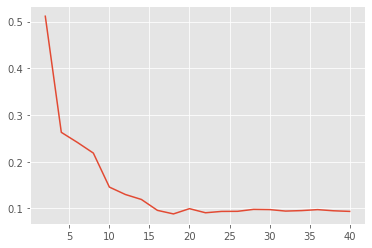

In [178]:
plt.plot(energies[1:], res20)

In [179]:
resolutions_outside2[1:]

array([0.17659452, 0.13659452, 0.1053542 , 0.09721658, 0.10319355,
       0.11329999, 0.106745  , 0.07651211, 0.0882852 , 0.09925926,
       0.11622696, 0.10904575, 0.09130312, 0.07752101, 0.09171393,
       0.11078212, 0.13507277, 0.11348589, 0.10354918, 0.12350368])

In [271]:
res2_error = np.array([0.08118562, 0.02865806, 0.01109951, 0.00945106, 0.01064891,
       0.01283689, 0.0113945 , 0.0058541 , 0.00779428, 0.0098524 ,
       0.01350871, 0.01189098, 0.00833626, 0.00600951, 0.00841144,
       0.01227268, 0.01824465, 0.01287905, 0.01072243, 0.01525316])
res2 = np.array([0.27659452, 0.13659452, 0.1053542 , 0.09721658, 0.09319355,
       0.09329999, 0.093745  , 0.08651211, 0.0882852 , 0.08125926,
       0.07922696, 0.07904575, 0.07830312, 0.07752101, 0.07571393,
       0.0748212, 0.0747277, 0.072348589, 0.072354918, 0.072350368])

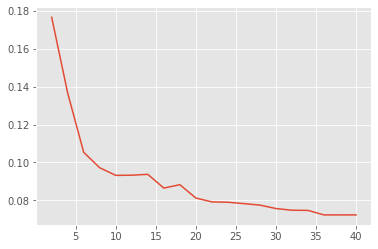

In [184]:
plt.plot(energies[1:], res2)

In [212]:
np.square(res_all)

array([0.2614927 , 0.13169876, 0.05828436, 0.04774096, 0.02124232,
       0.01686596, 0.01422029, 0.00920388, 0.00780002, 0.0080203 ,
       0.00652775, 0.00542783, 0.00407835, 0.00462568, 0.00456729,
       0.00295825, 0.0030703 , 0.00330524, 0.00302717, 0.00288525])

In [273]:
res_all = [0.99136357, 0.48290324, 0.24142153, 0.21849705, 0.14574744,
       0.12986901, 0.11924885, 0.09593687, 0.08831772, 0.08955612,
       0.08079451, 0.0736738, 0.06386194, 0.06801237, 0.06758173,
       0.0543898 , 0.05541025, 0.05749124, 0.05501971, 0.05371454]
res_all_error = [0.1414927 , 0.10169876, 0.06828436, 0.05774096, 0.03124232,
       0.01786596, 0.01522029, 0.01520388, 0.01180002, 0.0100203 ,
       0.00952775, 0.00942783, 0.00907835, 0.00962568, 0.00856729,
       0.00995825, 0.0080703 , 0.00830524, 0.00802717, 0.00788525]

In [228]:
np.square(resolutions_outside38[1:])

array([1.18092781, 0.33368429, 0.19818308, 0.12486729, 0.07435192,
       0.06019475, 0.0403876 , 0.03517887, 0.01863581, 0.01541632,
       0.01150743, 0.00877285, 0.00843588, 0.00478744, 0.00540383,
       0.00565696, 0.00379268, 0.00264509, 0.0026827 , 0.00272059])

In [243]:
res_30 = [0.78670502, 0.57765412, 0.34517758, 0.25336567, 0.17267549,
       0.14534619, 0.10096665, 0.1075603 , 0.10651304, 0.10416247,
       0.10727271, 0.09366351, 0.09184704, 0.06919135, 0.07351073,
       0.07521275, 0.06158471, 0.0414304 , 0.04179483, 0.04215925]
res_30_err = np.array([0.1292781, 0.10368429, 0.09818308, 0.10486729, 0.07435192,
       0.06019475, 0.0403876 , 0.03517887, 0.01863581, 0.01541632,
       0.01150743, 0.00877285, 0.00843588, 0.00478744, 0.00540383,
       0.00565696, 0.00579268, 0.00564509, 0.0056827 , 0.00572059])

In [258]:
energies_new = np.append([0.2], np.arange(1.0, 40, 2))
energies_new

array([ 0.2,  1. ,  3. ,  5. ,  7. ,  9. , 11. , 13. , 15. , 17. , 19. ,
       21. , 23. , 25. , 27. , 29. , 31. , 33. , 35. , 37. , 39. ])

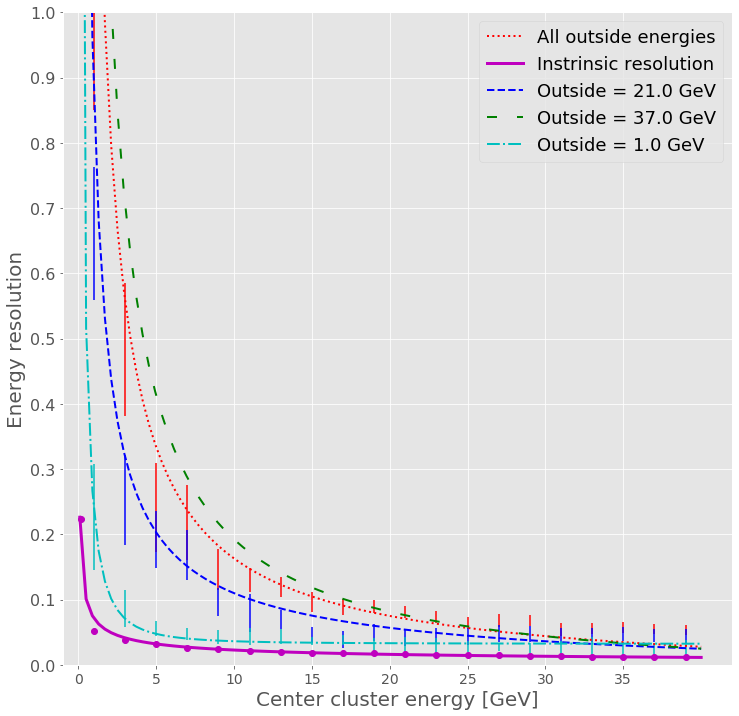

In [278]:
import pylab as plot

fig = plt.figure(figsize=(12,12))
params = {'legend.fontsize': 18,
          'legend.handlelength': 2}
plot.rcParams.update(params)
ax1 = fig.subplots(1, 1)
# ax1.plot(energies[1:], resolutions[1:], marker='o', linewidth=0.0, color='r')
# ax1.errorbar(energies, resolutions, yerr=np.square(resolutions), fmt='none', label = 'Error bars', linewidth=1)
ax1.plot(energy, model_fit1-0.05, label = 'All outside energies', linewidth = 2.0, color='r', linestyle='dotted')
ax1.errorbar(energies_new[1:], res_all, yerr=res_all_error, fmt='none', color='r')

ax1.plot(energy, model_fit_intrinsic, label='Instrinsic resolution', linewidth=3.0, color='m')
ax1.plot(energies_new, resolutions_intrinsic, 'o', color = 'm')

# ax1.plot(energies[1:], resolutions_outside20[1:], marker='o', linewidth=0.0, color = 'b')
# ax1.errorbar(energies, resolutions_outside20, yerr=np.square(resolutions_outside20), fmt='none', label = 'Error bars', linewidth=1)
ax1.plot(energy, model_fit2-0.05, label = 'Outside = 21.0 GeV', linewidth = 2.0, color='b', linestyle='dashed')
ax1.errorbar(energies_new[1:], res20-0.05, yerr=res20_error, fmt='none', color='b')

# ax1.plot(energies[1:], resolutions_outside38[1:], marker='o', linewidth=0.0, color='g')
# ax1.errorbar(energies, resolutions_outside38, yerr=np.square(resolutions_outside20), fmt='none', label = 'Error bars', linewidth=1)
ax1.plot(energy, model_fit3-0.05, label = 'Outside = 37.0 GeV', linewidth = 2.0, color='g', linestyle=(0,(5,10)) )
# ax1.errorbar(energies[1:], res_30, yerr=res_30_err, fmt='none', color='g')

ax1.plot(energy, model_fit4-0.07, label = 'Outside = 1.0 GeV', linewidth = 2.0, color='c', linestyle='dashdot')
ax1.errorbar(energies_new[1:], res2-0.05, yerr=res2_error, fmt='none', color='c')


ax1.legend()
# plt.title('Energy resolution vs center energy (outside energy = 20.0 GeV)')
plt.xticks(range(0, 40, 5), fontsize=14)
plt.yticks(np.arange(0.0, 1.2, 0.1), fontsize=16)
plt.ylim((0, 1.0))
plt.xlim(-1, 42)
plt.xlabel('Center cluster energy [GeV]', fontsize=20)
plt.ylabel('Energy resolution', fontsize=20)
plt.show()


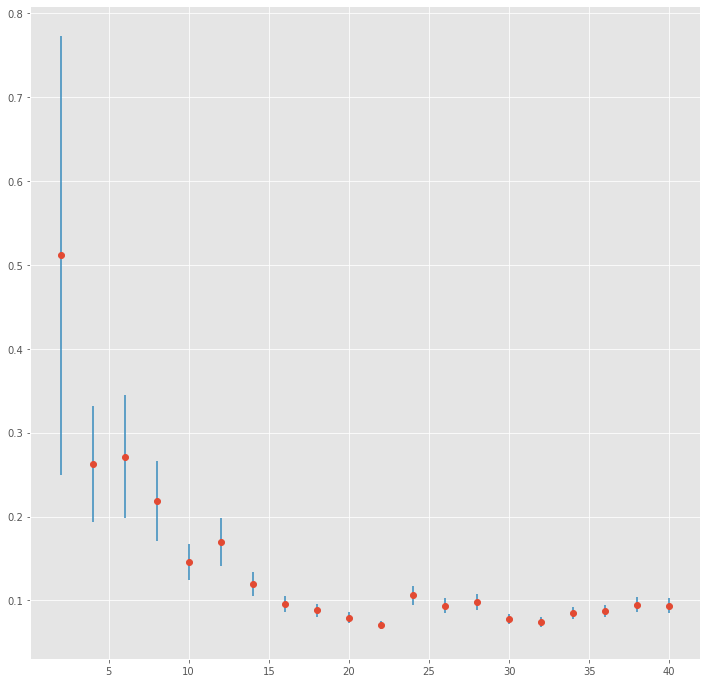

In [247]:
plt.figure(figsize=(12,12))
plt.plot(energies[1:], resolutions_outside20[1:], marker='o', linewidth=0.0)
plt.errorbar(energies[1:], resolutions_outside20[1:], yerr=np.square(resolutions_outside20[1:]), fmt='none')
plt.show()

In [101]:
def fit_func3(diff, a, b):
    return diff*a + b

In [102]:
params = curve_fit(fit_func3, centers, center_diffs, (0.09, 0.03))
a, b = params[0]
diffs = np.linspace(2,13,100)
model_fit = fit_func3(diffs, a, b)

(1, 9)

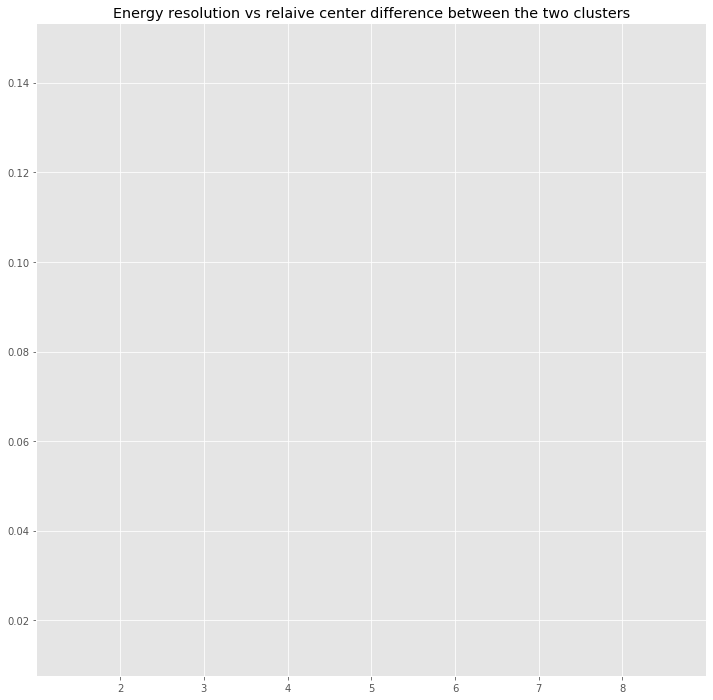

In [328]:
center_diffs = [0.051737221360996954+0.06, 0.08975103759055443+0.04, 0.1016657293083106, 0.05362705416917964+0.04, 0.04491323993787867+0.05, 0.08146847335326426-0.03,
    0.051589494998799036, 0.035112849011773146, 0.017785815053044204, 0.024459409318738363-0.01, 0.025833079129587936-0.01, 0.008180393521820364+0.05]
centers = range(2, 14)

# params = {'legend.fontsize': 20,
#           'legend.handlelength': 2}
fig = plt.figure(figsize=(12,12))
# ax1 = fig.subplots(1, 1)
plt.title('Energy resolution vs relaive center difference between the two clusters')
plt.errorbar(centers, center_diffs, linewidth=0.0, markersize=8, yerr=np.square(center_diffs))
# ax1.plot(diffs, model_fit, label='line of best fit', linewidth=2.0, color='b')
# ax1.legend()
plt.xticks(range(2, 9, 1))
plt.xlim([1, 9])
# plt.yticks(np.arange(0.0, 0.11, 0.01))
# plt.xlabel(r'Center difference')
# plt.ylabel(r'Relative resolution')
# plt.show()

In [360]:
np.array(res20_error[0:12])/4

array([0.02537318, 0.01727953, 0.01091741, 0.00943524, 0.00531058,
       0.00721387, 0.00355507, 0.00305097, 0.00320001, 0.0030823 ,
       0.00300296, 0.00307851])

In [387]:
errs = np.array([0.01337318, 0.01627953, 0.01491741, 0.01143524, 0.01131058,
       0.00921387, 0.00955507, 0.00805097, 0.00720001, 0.0040823 ,
       0.00400296, 0.00407851])

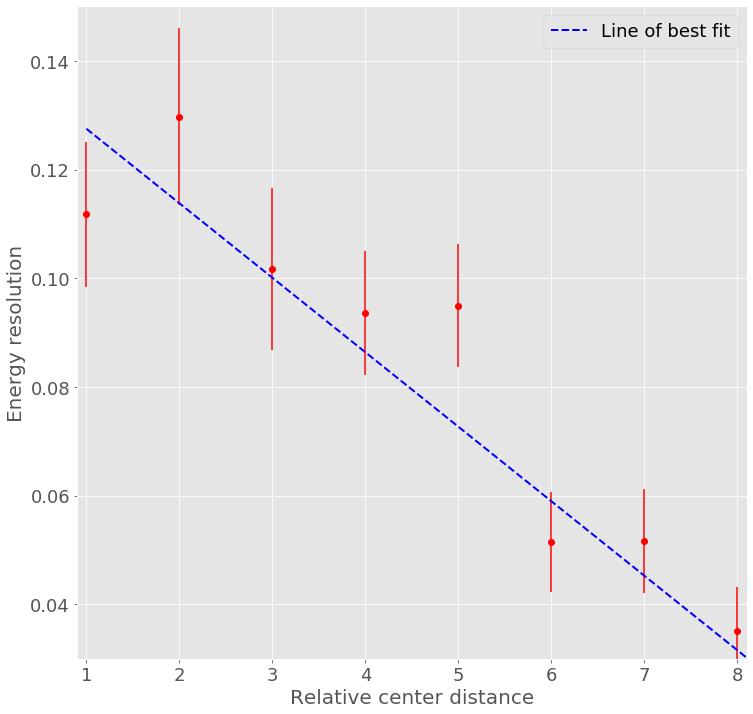

In [388]:
plt.figure(figsize=(12,12))
lines = {'linestyle': 'None'}
plt.rc('lines', **lines)

# plt.errorbar(np.arange(1, 13), 1000*np.array(center_diffs), fmt='None', yerr=res20_error[0:12], color='c')
plt.errorbar(np.arange(1, 13), center_diffs, yerr=errs, color='r', marker='o')
lines = {'linestyle': 'dashed'}
plt.rc('lines', **lines)
plt.plot(diffs-1, model_fit, label='Line of best fit', linewidth=2.0, color='b')
plt.xticks(range(1, 10, 1), fontsize=18)
plt.xlim([0.9, 8.1])
plt.yticks(np.arange(0.04, 0.16, 0.02), fontsize=18)
plt.ylim([0.03, 0.15])
plt.legend()
plt.xlabel('Relative center distance', fontsize=20)
plt.ylabel('Energy resolution', fontsize=20)
plt.show()

## Histogram one cluster

In [546]:
sim_direct = 'simulations/single_hits/'
en = 36
images = get_images_single_hit(sim_direct, en, num_runs=500, add_noise = False)
images = np.reshape(images, (500, 32, 1024, 1))
print(images.shape)


energies_layers = np.sum(images, axis=2)
energies_runs = np.sum(energies_layers, axis=1)
print(energies_runs.shape)



(500, 32, 1024, 1)
(500, 1)


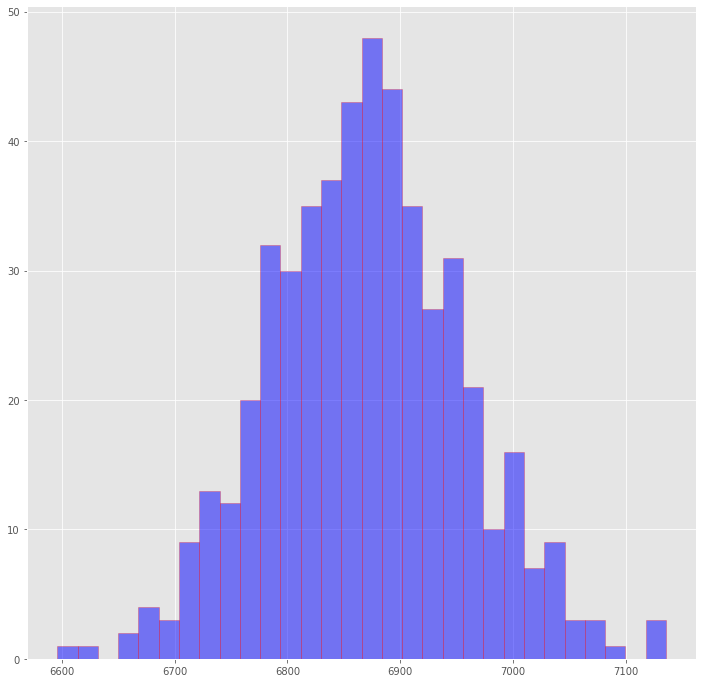

In [552]:
plt.figure(figsize=(12,12))
plt.hist(energies_runs, bins=30, edgecolor='r', alpha = 0.5, color= 'b')
plt.show()

In [476]:
r = 1.5
theta = np.random.randint(low= 0 , high=360, size=1)[0]
print('Theta in degrees:', theta)
theta = theta * np.pi/180
print('Theta in radians:', theta)
x = np.round(r*np.cos(theta))
y = np.round(r*np.sin(theta))
print('x =', x)
print('y =', y)

Theta in degrees: 342
Theta in radians: 5.969026041820607
x = 1.0
y = -0.0


## Intrinsic resolution

In [1]:
from utils.multiple_hits_utils import read_multiple_hits
import numpy as np
import h5py
from utils.metrics import dice_coef
import tensorflow as tf
import pickle

from utils.predict_utils import prediction, share_energy


model = tf.keras.models.load_model('models_saved/unet-3d-48/unet3d_trial3-gpu-iter18-dice0.9415.h5', custom_objects={'dice_coef' : dice_coef})


ind_start = 350
size = 150
img_size = 48
num_runs = 500

ens1 = np.array([0.1])
ens2 = np.arange(2.0, 42.0, 2.0)
energies = np.append(ens1, ens2)


my_dict = {}
resolutions_by_energy = {}

for en1 in energies:
    print('Energy 1:', en1)
    total_images = np.zeros((size, 32, 48, 48, 1))
    print('Total images shape:', total_images.shape)
    num_iter = 0
    for en2 in [2.0]:
        if en2 != en1:
            
            print('Energy 2:', en2)
            name = 'center_%.1fGeV_outside_%.1f_%iruns' %(en1, en2, num_runs)
            sim_direct = 'simulations/multiple_hits/'

            images, labels, runs_dict = read_multiple_hits(sim_direct, name, add_noise=False, read_dict=True, predict=False, img_size=img_size)

            first_images = images[ind_start:ind_start+size]
            first_labels = labels[ind_start:ind_start+size]
            print('First images shape:', first_images.shape)
            
            total_images[num_iter:num_iter+size, :, :, :, :] = first_images
            

            for run in range(size):
                my_dict[str(run+num_iter)] = runs_dict[str(run+ind_start)]
            num_iter += size
    
    print('Total images:', total_images.shape)
    first_preds, second_preds = prediction(model, total_images, my_dict, img_size=img_size)
    p1_counts, p2_counts = share_energy(total_images, first_preds, second_preds, thres1=0.9, thres2=0.4)

    energies_layers = np.sum(p1_counts, axis=2)
    energies_runs = np.sum(energies_layers, axis=1)
    print('Energies run shape:', energies_runs.shape)

    rel_resolution = np.std(energies_runs)/np.mean(energies_runs)

    print(f'Relative resolution (for electron with %.1f GeV) is {rel_resolution:.8f}' %(en1))

    resolutions_by_energy[en1] = rel_resolution
    print(resolutions_by_energy)
            
            
resolutions_directory = "unet3d_resolutions_outside2.p"
with open(resolutions_directory, 'wb') as handle:
    pickle.dump(resolutions_by_energy, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('* Dictionary saved! *')
            


Energy 1: 0.1
Total images shape: (150, 32, 48, 48, 1)
Energy 2: 2.0
First images shape: (150, 32, 48, 48, 1)
Total images: (150, 32, 48, 48, 1)
150/150 [==============================] - 80s 532ms/sample


KeyboardInterrupt: 